In [1]:
import json
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from collections import Counter

In [2]:
root_dir = "My Activity"

In [3]:
all_data = []

In [4]:
for app_folder in os.listdir(root_dir):
    app_path = os.path.join(root_dir, app_folder)
    
    if os.path.isdir(app_path):  
        for file_name in os.listdir(app_path):
            if file_name.endswith("EST.json"):
                file_path = os.path.join(app_path, file_name)
                
                with open(file_path, "r", encoding="utf-8") as file:
                    try:
                        data = json.load(file)
                        for event in data:
                            timestamp = event.get("time", event.get("timestamp"))
                            activity = app_folder
                            if timestamp:
                                all_data.append({"timestamp": timestamp, "activity": activity})
                    except Exception as e:
                        print(f"Error loading {file_path}: {e}")

In [5]:
df = pd.DataFrame(all_data)
df["timestamp"] = pd.to_datetime(df["timestamp"], errors="coerce")
df = df.dropna(subset=["timestamp"])
df = df.sort_values("timestamp")

In [6]:
df = df[(df["timestamp"].dt.year == 2024) & (df["timestamp"].dt.month == 10)]

Total Activity Counts per App in October 2024:
Google Translate: 770 activities
Chrome: 622 activities
Search: 511 activities
Maps: 319 activities
YouTube: 21 activities
Google Analytics: 17 activities
Hotels: 5 activities
Flights: 5 activities
Video Search: 4 activities
Image Search: 3 activities
Help: 2 activities
Books: 1 activities
Gmail: 1 activities
Ads: 1 activities


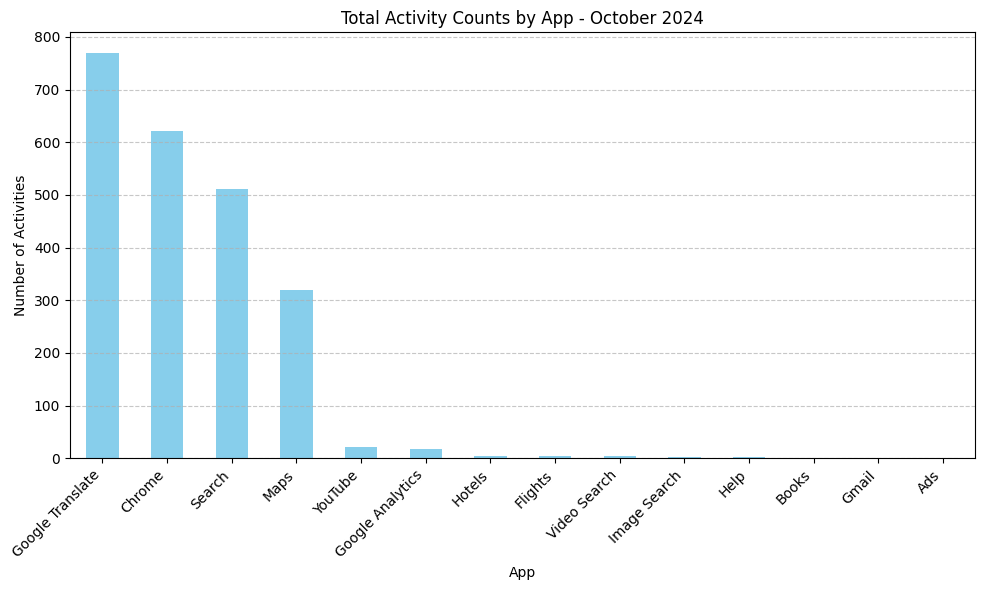

In [ ]:
app_activity_counts = df["activity"].value_counts()
print("Total Activity Counts per App in October 2024:")
for app, count in app_activity_counts.items():
    print(f"{app}: {count} activities")


plt.figure(figsize=(10, 6))
app_activity_counts.plot(kind='bar', color='skyblue')
plt.title("Total Activity Counts by App - October 2024")
plt.xlabel("App")
plt.ylabel("Number of Activities")
plt.xticks(rotation=45, ha='right')  
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()  
plt.show()


In [8]:
top_apps = df["activity"].value_counts().head(5).index.tolist()
print("Top 5 Most Used APP in 10/2024", top_apps)
df = df[df["activity"].isin(top_apps)]

Top 5 Most Used APP in 10/2024 ['Google Translate', 'Chrome', 'Search', 'Maps', 'YouTube']


In [9]:
df["hour"] = df["timestamp"].dt.hour
df["day"] = df["timestamp"].dt.day
df["week"] = df["timestamp"].dt.isocalendar().week
df["day_of_week"] = df["timestamp"].dt.dayofweek  
df["month"] = df["timestamp"].dt.month
df["weekend"] = df["day_of_week"] >= 5

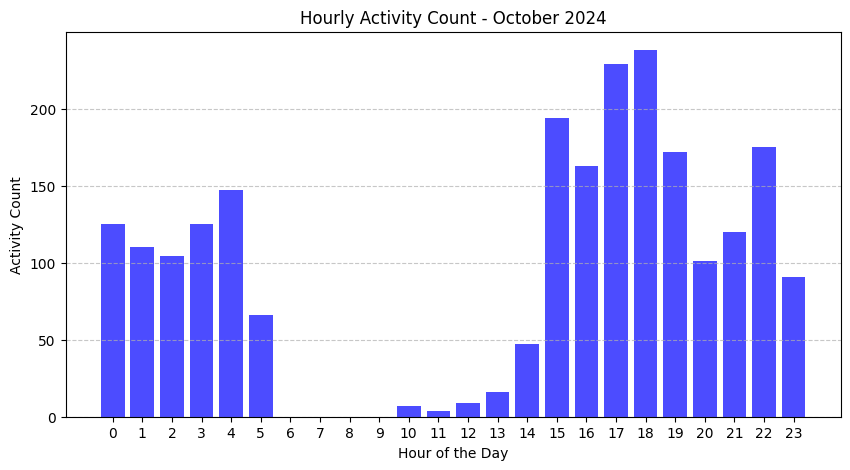

In [10]:
hourly_activity = df.groupby("hour").size()
plt.figure(figsize=(10, 5))
plt.bar(hourly_activity.index, hourly_activity.values, color="blue", alpha=0.7)
plt.xlabel("Hour of the Day")
plt.ylabel("Activity Count")
plt.title("Hourly Activity Count - October 2024")
plt.xticks(range(24))
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

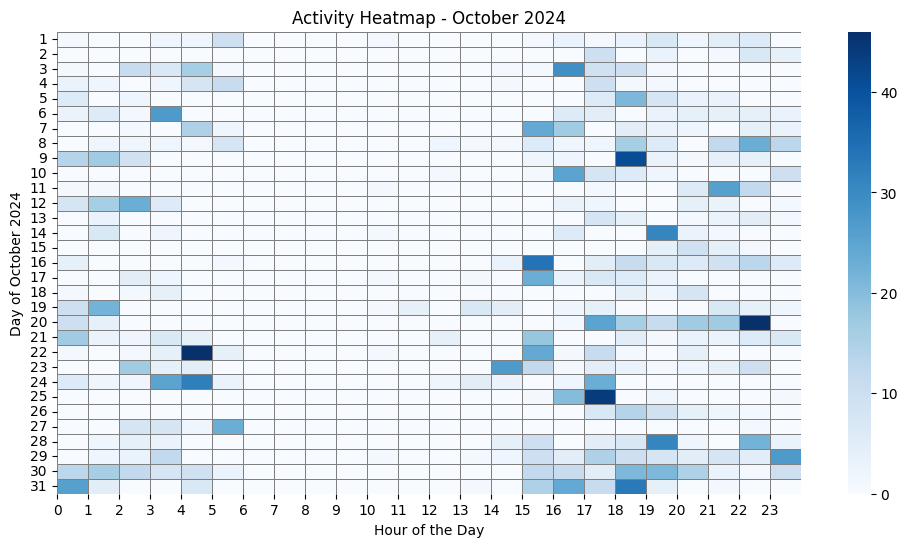

In [ ]:
ssheatmap_data = df.groupby(["day", "hour"]).size().unstack(fill_value=0)

all_hours = list(range(24))
heatmap_data = heatmap_data.reindex(columns=all_hours, fill_value=0)

plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap="Blues", linewidths=0.5, linecolor='gray')
plt.xlabel("Hour of the Day")
plt.ylabel("Day of October 2024")
plt.title("Activity Heatmap - October 2024")
plt.xticks(range(24), range(24))
plt.show()

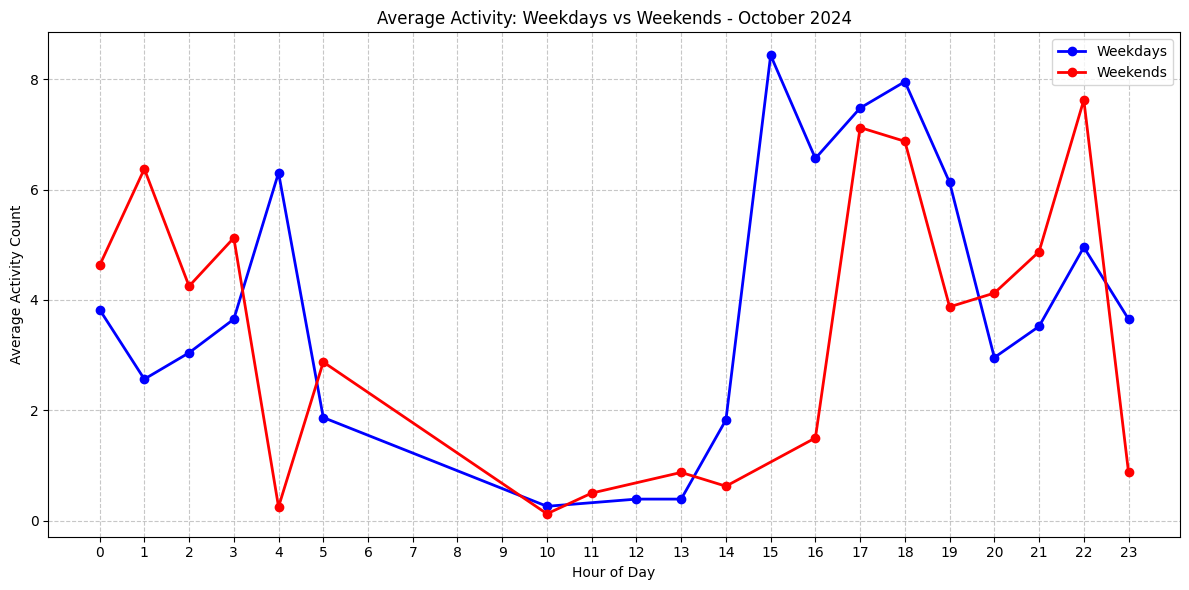

In [ ]:
weekday_hourly = df_weekday.groupby('hour').size() / len(df_weekday['day'].unique())
weekend_hourly = df_weekend.groupby('hour').size() / len(df_weekend['day'].unique())

plt.figure(figsize=(12, 6))

plt.plot(weekday_hourly.index, weekday_hourly.values, 
         label='Weekdays', color='blue', marker='o', linewidth=2)
plt.plot(weekend_hourly.index, weekend_hourly.values, 
         label='Weekends', color='red', marker='o', linewidth=2)

plt.title('Average Activity: Weekdays vs Weekends - October 2024')
plt.xlabel('Hour of Day')
plt.ylabel('Average Activity Count')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.xticks(range(24))


plt.grid(True, which='minor', linestyle=':', alpha=0.4)

plt.tight_layout()
plt.show()

/var/folders/cd/3tn6j4nd4pg5dtnhwxzrlywh0000gn/T/ipykernel_13071/1600811190.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="hour", y="weekend", data=df, orient="h", palette="Set2")


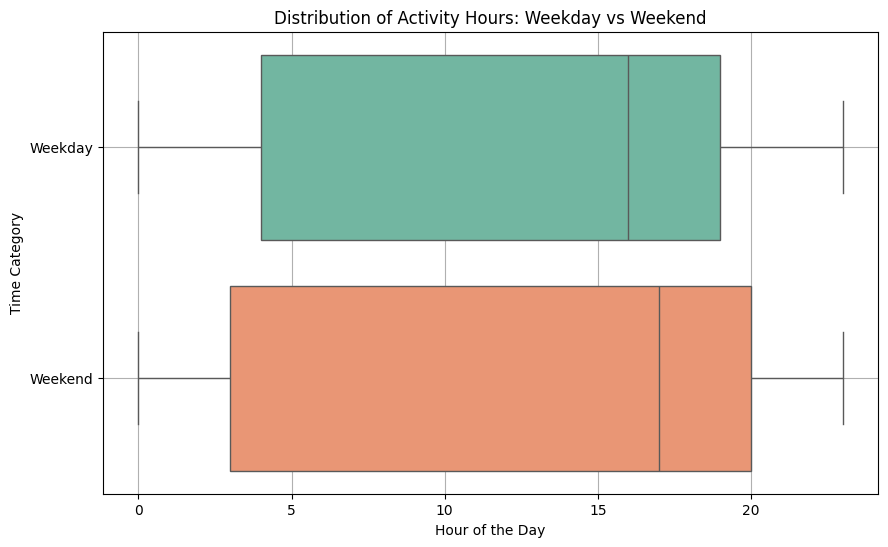

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="hour", y="weekend", data=df, orient="h", palette="Set2")
plt.yticks([0, 1], ["Weekday", "Weekend"])
plt.xlabel("Hour of the Day")
plt.ylabel("Time Category")
plt.title("Distribution of Activity Hours: Weekday vs Weekend")
plt.grid(True)
plt.show()